In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bisect

In [2]:
data = pd.read_csv('data_monthly_rainfall.csv')

In [3]:
def grade(score):
    # For sampling the input 
    breakpoints = [i for i in range(0,1500,250)]
    if score>1500:
        return len(breakpoints) + 1
    
    i = bisect.bisect_left(breakpoints, score)  # left insertion index returned
    return i

Text(0.5, 1.0, 'Month vs Rainfall')

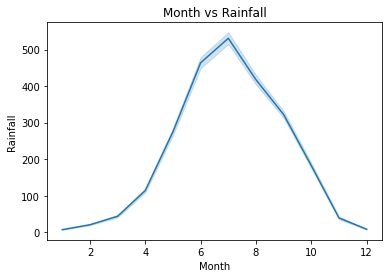

In [4]:
df = pd.DataFrame(data)
#plt.figure(figsize=(14,10)) 
sns.lineplot(x= df['Month'], y= df['Rainfall']) 
plt.title("Month vs Rainfall") 


In [5]:
max(data.Rainfall)

3001

In [6]:
RainLevel = []
for d in data['Rainfall']:
    #print(d)
    RainLevel.append(grade(d))
data['RainLevel'] = RainLevel
data


,Year,Station,Month,Rainfall,StationIndex,RainLevel
0,1970,Barisal,1,0,2,0
1,1970,Barisal,2,24,2,1
2,1970,Barisal,3,5,2,1
3,1970,Barisal,4,91,2,1
4,1970,Barisal,5,124,2,1
...,...,...,...,...,...,...
16750,2016,Teknaf,8,920,33,4
16751,2016,Teknaf,9,512,33,3
16752,2016,Teknaf,10,208,33,1
16753,2016,Teknaf,11,53,33,1


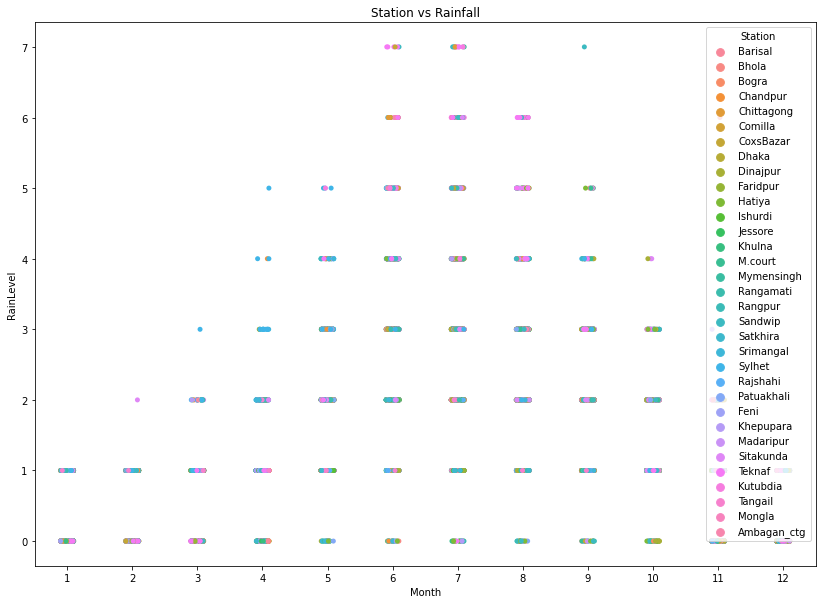

In [7]:
plt.figure(figsize=(14,10)) 
sns.stripplot(x='Month', y='RainLevel', data=df,jitter=True,
 hue='Station',
 dodge=False
 )
 
plt.title("Station vs Rainfall");


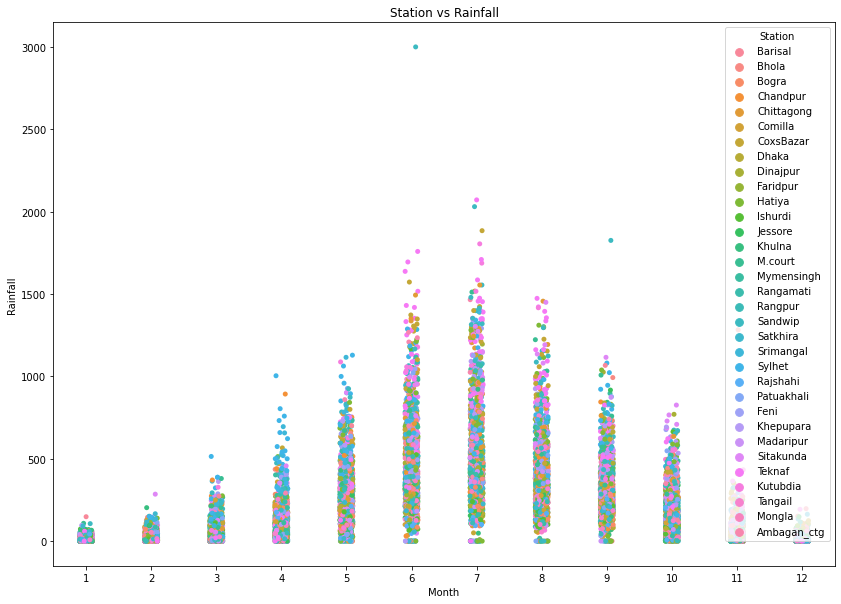

In [8]:
plt.figure(figsize=(14,10)) 
sns.stripplot(x='Month', y='Rainfall', data=df,jitter=True,
 hue='Station',
 dodge=False
 )
 
plt.title("Station vs Rainfall");


In [9]:
x = df[['Month' , 'StationIndex',  ]]
y = df['RainLevel']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 16)

In [10]:

from sklearn import svm 
from sklearn import metrics 
import numpy as np
model_svm = svm.SVC()
model_svm.fit(X_train, y_train) 
y_prediction_svm = model_svm.predict(X_test) 
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

In [11]:
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) 
y_prediction_dt = model_dt.predict(X_test) 
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)


In [12]:

from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train) 
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)

In [13]:

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB() 
model_nb.fit(X_train, y_train) 
y_prediction_nb = model_nb.predict(X_test) 
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)

In [14]:
print('The accuracy of the SVM is: {}'.format(score_svm))
print('The accuracy of the DT is: {}'.format(score_dt))
print('The accuracy of the KNN is: {}'.format(score_knn))
print('The accuracy of the NB is: {}'.format(score_nb))

The accuracy of the SVM is: 0.5629
The accuracy of the DT is: 0.6068
The accuracy of the KNN is: 0.5631
The accuracy of the NB is: 0.5164
